In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_read=pd.read_csv("vgsales.csv")
dfa=data_read[["Rank","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

	NA_Sales - Sales in North America (in millions)
	EU_Sales - Sales in Europe (in millions)
	JP_Sales - Sales in Japan (in millions)
	Other_Sales - Sales in the rest of the world (in millions)
	Global_Sales - Total worldwide sales.
	ALL THE SALES ARE GIVEN IN MILLIONS


# 1. Show the percentage of games created before and after the year 2000 using pie chart

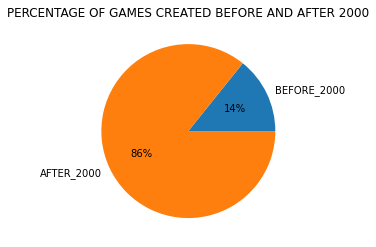

In [2]:

b_count=dfa[dfa["Year"]<=2000 ]   
a_count=dfa[dfa["Year"]>2000]
year=[len(b_count),len(a_count)]
label=["BEFORE_2000","AFTER_2000"]
plt.pie(year,labels=label,autopct="%0.0f%%")
plt.title("PERCENTAGE OF GAMES CREATED BEFORE AND AFTER 2000")
plt.show()

# 2.compare the genre of games

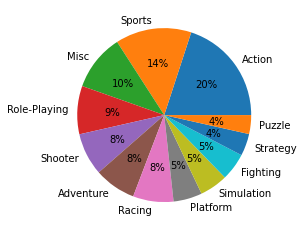

In [3]:
t=dfa["Genre"].value_counts()


pie_data=dfa["Genre"].value_counts()
plt.pie(pie_data,labels=t.index.tolist(),autopct="%0.0f%%")

plt.show()

# 3.Find the total number of publishers  and list their names

In [4]:
p=dfa.drop_duplicates("Publisher")
print("TOTAL NUMBER OF PUBLISHERS =",len(p))
print("THE NAME OF PUBLISHERS ARE LISTED BELOW:\n",'\033[1m'+p['Name']+'\033[0m')

TOTAL NUMBER OF PUBLISHERS = 579
THE NAME OF PUBLISHERS ARE LISTED BELOW:
 0                                 Wii Sports
15                        Kinect Adventures!
16                        Grand Theft Auto V
28                    Gran Turismo 3: A-Spec
29            Call of Duty: Modern Warfare 3
                            ...                     
16472    Azure Striker Gunvolt: Striker Pack
16503                    Shinigami to Shoujo
16510                        Palais de Reine
16565                              Teslagrad
16570          Farming 2017 - The Simulation
Name: Name, Length: 579, dtype: object


# 4.Show most and least choosen genre

In [5]:
f=dfa["Genre"].value_counts()
genre_max_name=f.idxmax()
genre_min_name=f.idxmin()
print("\033[1mTHE MOST USED GENRE IS",'\033[1m\033[94m'+genre_max_name+'\033[0m')
print("\033[1mTHE LEAST USED GENRE IS",'\033[1m\033[94m'+genre_min_name+'\033[0m')

THE MOST USED GENRE IS Action
THE LEAST USED GENRE IS Puzzle


# 5.Show the Global_sales  with respect to platform

In [6]:
psales= dfa.groupby(['Platform'])['Global_Sales'].sum().reset_index()
print(psales.sort_values(by='Global_Sales',ascending=False))

   Platform  Global_Sales
16      PS2       1255.64
28     X360        979.96
17      PS3        957.84
26      Wii        926.71
4        DS        822.49
15       PS        730.66
6       GBA        318.50
19      PSP        296.28
18      PS4        278.10
13       PC        258.82
29       XB        258.26
5        GB        255.45
11      NES        251.07
2       3DS        247.46
10      N64        218.88
23     SNES        200.05
7        GC        199.36
30     XOne        141.06
0      2600         97.08
27     WiiU         81.86
20      PSV         61.93
21      SAT         33.59
8       GEN         28.36
3        DC         15.97
22      SCD          1.87
12       NG          1.44
25       WS          1.42
24     TG16          0.16
1       3DO          0.10
9        GG          0.04
14     PCFX          0.03


# 6.Show the most used platform by the most used publisher

In [7]:
pu_most=dfa["Publisher"].value_counts()
pu_max_name=pu_most.idxmax()
pl_most=dfa[dfa["Publisher"]==pu_max_name]['Platform']
pl=pl_most.value_counts()
pl_max=pl.idxmax()
print("\033[1mTHE MOST USED PUBLISHER IS\t\t\t:",pu_max_name)
print("THE MOST USED PLATFORM BY",pu_max_name," IS\t:",pl_max+"\033[0m")


THE MOST USED PUBLISHER IS			: Electronic Arts
THE MOST USED PLATFORM BY Electronic Arts  IS	: PS2


# 7.List the various games according to their platform

In [8]:
u=dfa['Platform'].drop_duplicates()
for Platform in u:
    print('\033[1m\033[4m\033[91m'+Platform+"\033[0m\n\n")
    name=dfa[dfa["Platform"]==Platform]['Name']
    print(name)


Wii


0                                               Wii Sports
2                                           Mario Kart Wii
3                                        Wii Sports Resort
7                                                 Wii Play
8                                New Super Mario Bros. Wii
                               ...                        
16517                         Teenage Mutant Ninja Turtles
16552             Mahou Sensei Negima!? Neo-Pactio Fight!!
16573                                  Mini Desktop Racing
16574    Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...
16581                                            Fit & Fun
Name: Name, Length: 1325, dtype: object
NES


1                                        Super Mario Bros.
9                                                Duck Hunt
22                                     Super Mario Bros. 3
96                                     Super Mario Bros. 2
127                                    The Legend of Zelda
    

9223                         Doukyuusei
15535    Ginga Fukei Densetsu: Sapphire
Name: Name, dtype: object
3DO


12635                             Policenauts
14996                             Bust-A-Move
15479    Sotsugyou II: Neo Generation Special
Name: Name, dtype: object
GG


13525    Sonic the Hedgehog 2 (8-bit)
Name: Name, dtype: object
PCFX


14556    Blue Breaker: Ken Yorimo Hohoemi o
Name: Name, dtype: object


# 8.JP Sales vs EU sales graph

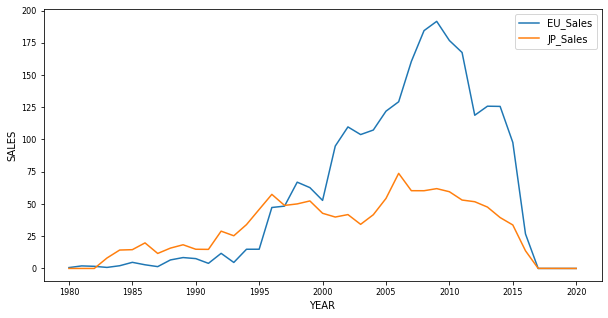

In [9]:
eusales= dfa.groupby(['Year'])['EU_Sales'].sum().reset_index()
jpsales= dfa.groupby(['Year'])['JP_Sales'].sum().reset_index()
df = eusales.append(jpsales, ignore_index=True)
linegraph= df.plot.line(x = 'Year', xlabel="YEAR",ylabel="SALES",figsize=(10,5), fontsize='8')

# 9.List max of EU,JP,NA and Other sales

In [10]:
EU_Max=dfa['EU_Sales'].max()
print("\033[1mMAXIMUM OF EUROPE SALES IS \t\t:",EU_Max,"MILLIONS\033[0m")
JP_Max=dfa['JP_Sales'].max()
print("\033[1mMAXIMUM OF JAPAN SALES IS \t\t:",JP_Max,"MILLIONS\033[0m")
NA_Max=dfa['NA_Sales'].max()
print("\033[1mMAXIMUM OF NORTH AMERICA SALES IS \t:",NA_Max,"MILLIONS\033[0m")
Ot_Max=dfa['Other_Sales'].max()
print("\033[1mMAXIMUM OF OTHER NATION SALES IS \t:",Ot_Max,"MILLIONS\033[0m")

MAXIMUM OF EUROPE SALES IS 		: 29.02 MILLIONS
MAXIMUM OF JAPAN SALES IS 		: 10.22 MILLIONS
MAXIMUM OF NORTH AMERICA SALES IS 	: 41.49 MILLIONS
MAXIMUM OF OTHER NATION SALES IS 	: 10.57 MILLIONS


# 10.Publisher wise Global sales

In [11]:
pusales= dfa.groupby(['Publisher'])['Global_Sales'].sum().reset_index()
print(pusales.sort_values(by='Global_Sales',ascending=False))

                       Publisher  Global_Sales
359                     Nintendo       1786.56
138              Electronic Arts       1110.32
21                    Activision        727.46
456  Sony Computer Entertainment        607.50
525                      Ubisoft        474.72
..                           ...           ...
375                    Ongakukan          0.01
96                      Commseed          0.01
495                       Takuyo          0.01
76                      Boost On          0.01
350                   Naxat Soft          0.01

[578 rows x 2 columns]


# 11.Scatter plot for year wise global sales

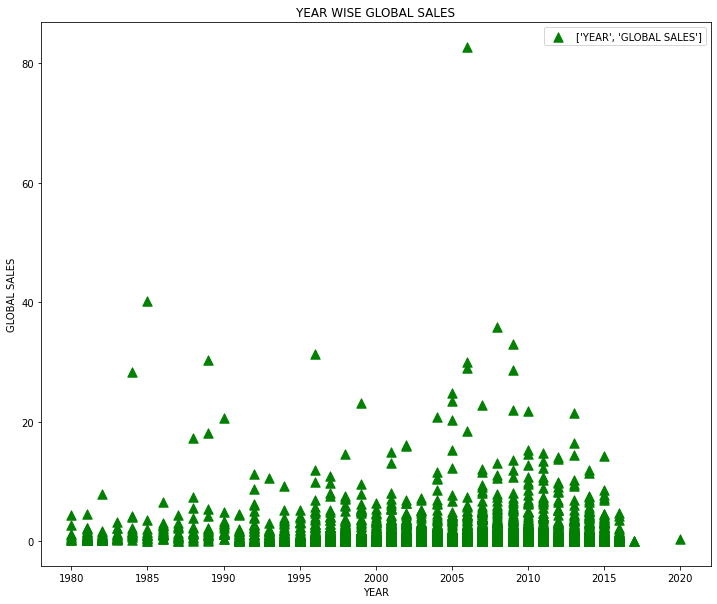

In [12]:
x=dfa['Year']
y=dfa['Global_Sales']
plt.figure(figsize=(12,10))
plt.scatter(x,y,color='g',marker='^',s=88)
plt.title("YEAR WISE GLOBAL SALES")
plt.xlabel("YEAR")
plt.ylabel("GLOBAL SALES")
plt.legend([["YEAR","GLOBAL SALES"]])

plt.show()

# 12.Year wise NA_Sales

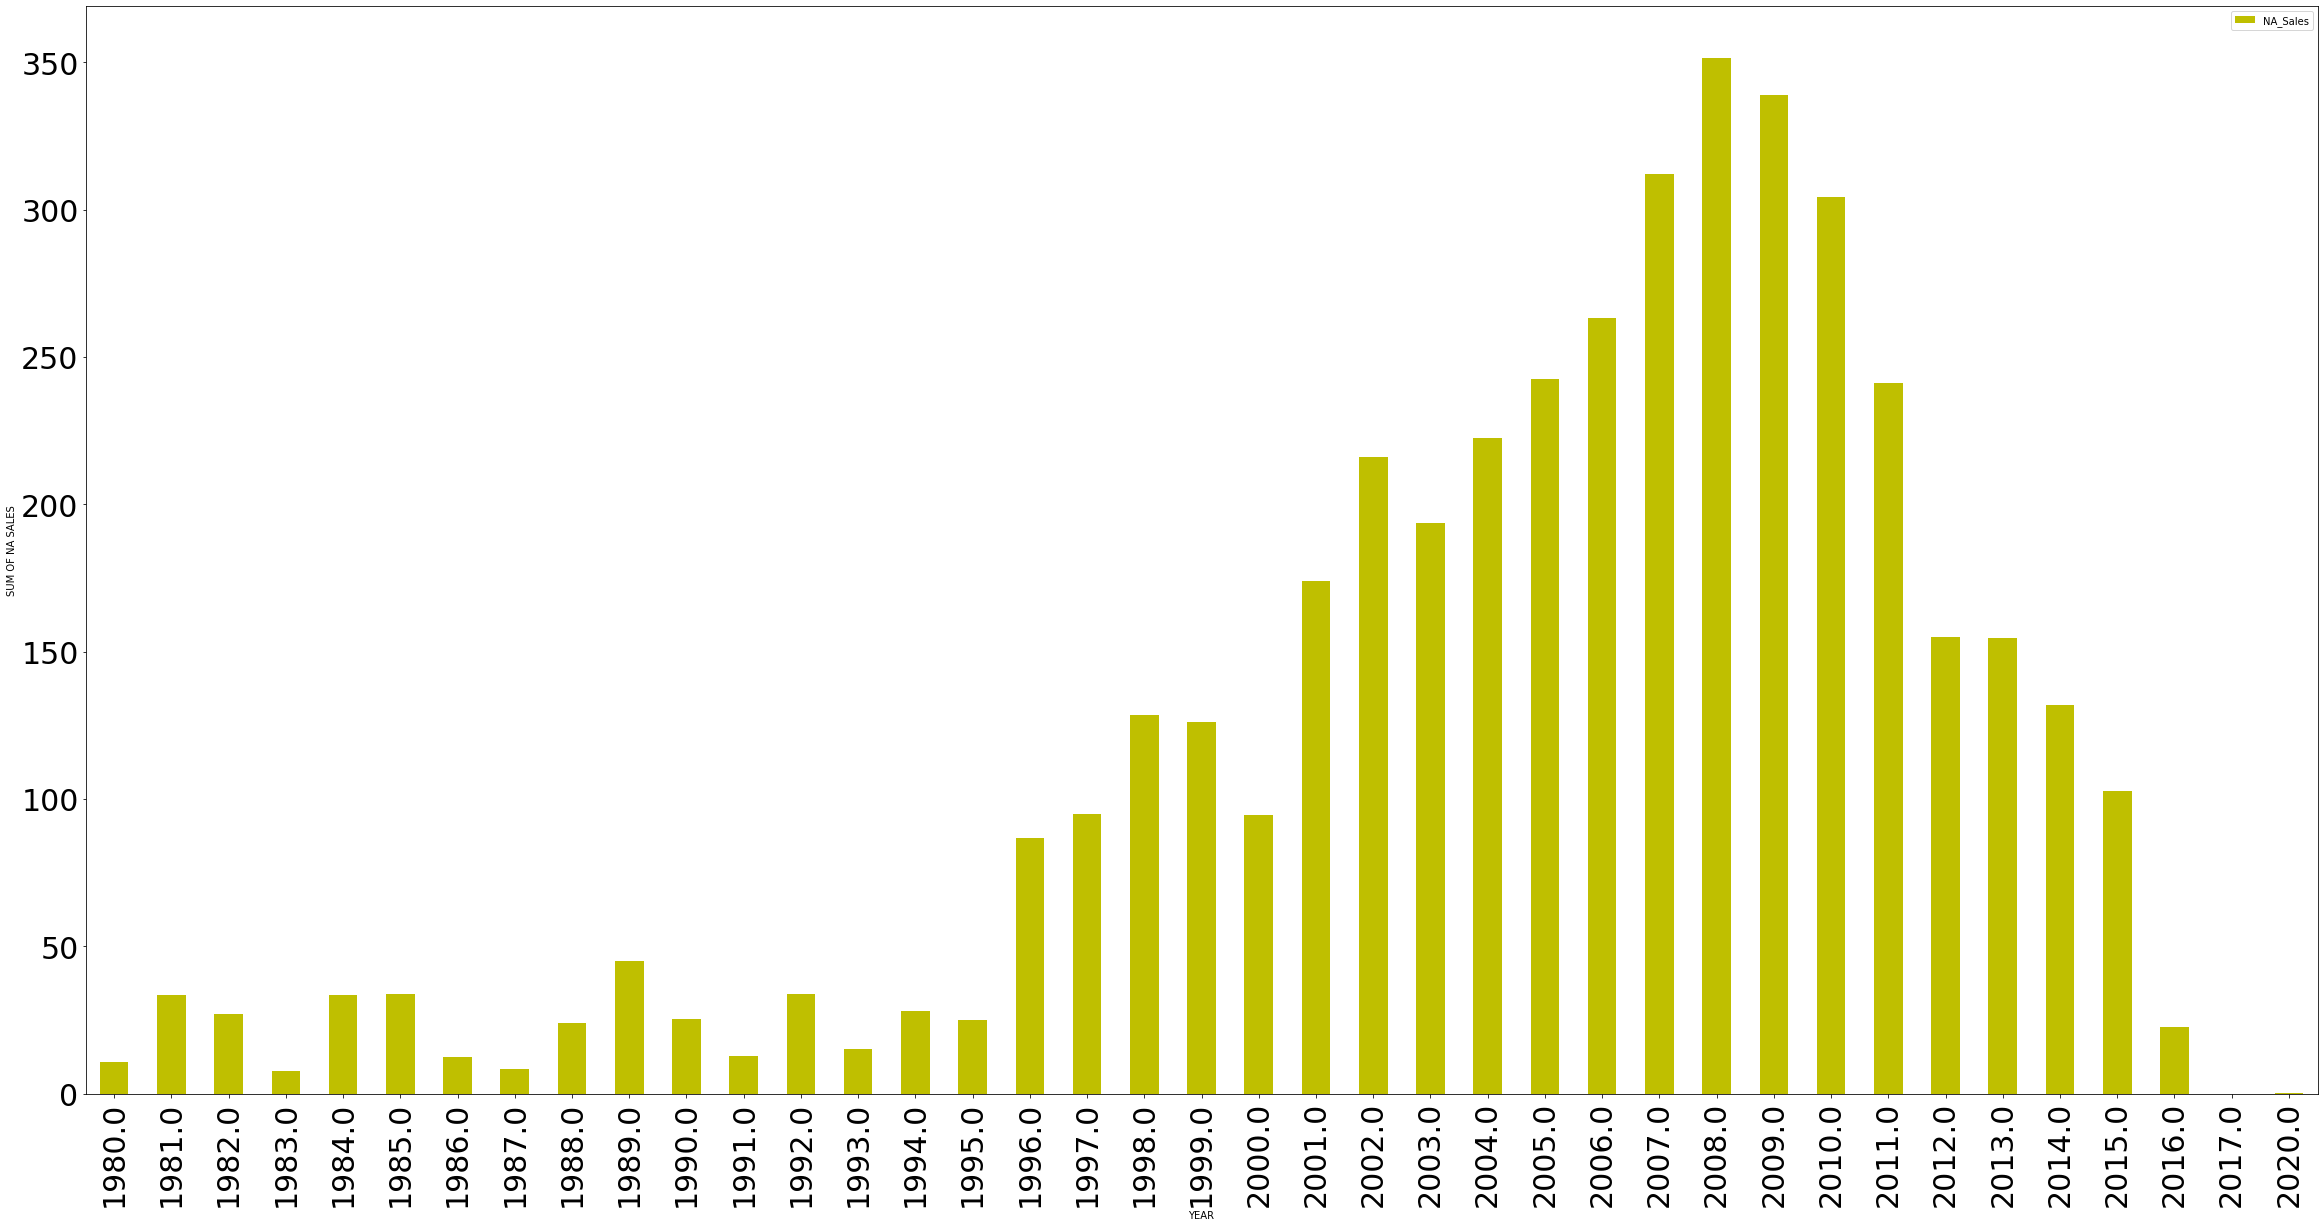

In [13]:
ysales= dfa.groupby(['Year'])['NA_Sales'].sum().reset_index()
bargraph = ysales.plot.bar(x = 'Year', y = 'NA_Sales',figsize=(40,20),xlabel="YEAR",ylabel="SUM OF NA SALES", fontsize='30',color='y')


# 13.Draw histogram in the basis of count of game with respect to platform

[Text(0, 0.5, 'Game Count')]

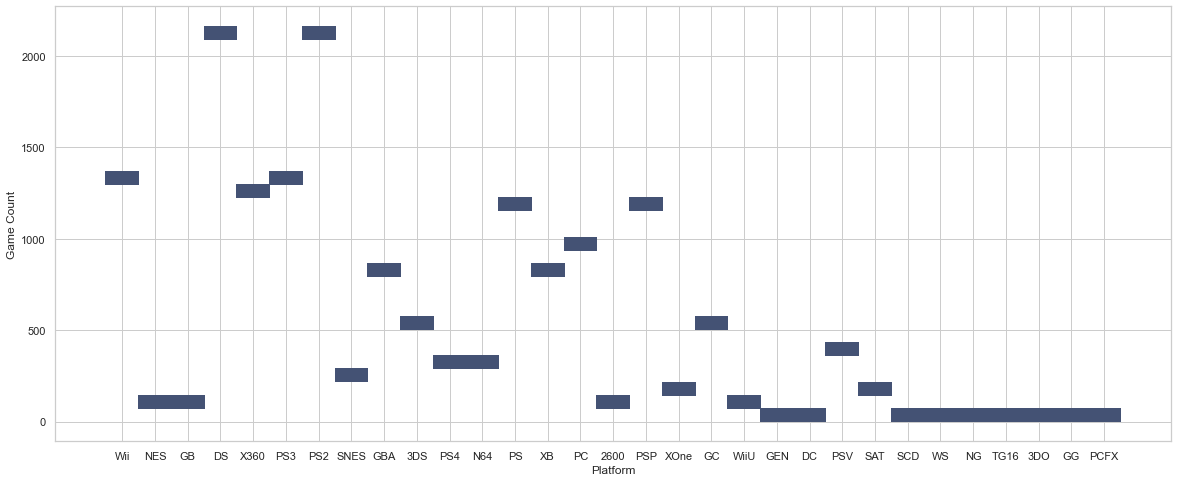

In [14]:
get_all_plat  = dfa['Platform'].drop_duplicates()
game_count = [dfa[dfa['Platform']==f"{plat}"]['Name'].value_counts().sum() for plat in get_all_plat ]
df = pd.DataFrame({"Platform":list(get_all_plat), "Game_Count":game_count})

import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x="Platform", y="Game_Count",bins=30)
ax.set(ylabel="Game Count")

# 14. Show the games which has Global_sales more than 20 millions

In [39]:
Name=dfa[dfa['Global_Sales'] >20]
a=Name['Name'].count()
print("TOTAL NUMBER OF GAMES HAVING MORE THAN 20 MILLION GLOBAL SALES IS:",a)
print(Name['Name'])

TOTAL NUMBER OF GAMES HAVING MORE THAN 20 MILLION GLOBAL SALES IS: 20
0                                       Wii Sports
1                                Super Mario Bros.
2                                   Mario Kart Wii
3                                Wii Sports Resort
4                         Pokemon Red/Pokemon Blue
5                                           Tetris
6                            New Super Mario Bros.
7                                         Wii Play
8                        New Super Mario Bros. Wii
9                                        Duck Hunt
10                                      Nintendogs
11                                   Mario Kart DS
12                     Pokemon Gold/Pokemon Silver
13                                         Wii Fit
14                                    Wii Fit Plus
15                              Kinect Adventures!
16                              Grand Theft Auto V
17                   Grand Theft Auto: San Andreas
18          

# 15.If any columns in sales of all countries has value <1 million then del that row

In [ ]:
dfa.drop(dfa.index[dfa['NA_Sales'] <1], inplace=True)
dfa.drop(dfa.index[dfa['EU_Sales'] <1], inplace=True)
dfa.drop(dfa.index[dfa['JP_Sales'] <1], inplace=True)
dfa.drop(dfa.index[dfa['Other_Sales'] <1], inplace=True)
dfa